##### Choose 9 stocks of your choice and create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution.

In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

#the use of _ after the 2nd mean is telling the system its a variable name not the same as the function
def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #next is for list with even number length, this is divided by 2 with no reminder, 0
    if n % 2 !=0:
        #next is for odd length list
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        #pass slice with two middle values to mean(the mean of the two middle index)
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
    return median_


def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    #population variance of lis = sum(xi - list_mean)**2)/n for all xi in list. first we save the mean of the list
    list_mean = mean(list_obj)
    #tge n will be used to calculate the average of sum of squared difference
    n = len(list_obj)
    #create vale that the squared differnces will be added to
    sum_sq_diff = 0
    for val in list_obj:
        #this will add each squared difference to the sum_sq_diff variable
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        #normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n-1)
        
    return variance_

def SD(list_obj, sample = False):
    #standard deviation is the square root of variance
    SD_ = variance(list_obj) ** 1/2
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    #first find the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    #instantiate(express) a variable holding the value of 0:
    #this will be used to sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    #the list lenght must be equal hence check
    if n1 == n2:
        n = n1
        #sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        #account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        #return covariance
        return cov
    else:
        print("List lenghts are not equal")
        print("List1:", n1)
        print("List2:", n1)
        
def correlation (list_obj1, list_obj2):
    # correlation(x,y) = cov(x,y) / (SD(x) 8 SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n* skew / ((n-1)*(n-2) * SD_ ** 3)
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [2]:
import pandas as pd

def gather_statistics(df, sample = False):
    #create a dictionary of dictionaries with an entry for each column of data in a dataframe, df
    dct = {key:{} for key in df}
    #call each column of data and its name (key)
    #df.items() makes a list of tuples where tuple index 0 refers to the key, index 1 refers to object pointed to by key
    for key, val in df.items():
        # inplace = True alters the object itself
        val.dropna(axis=0, inplace = True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["SD"] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
    
    stats_df = pd.DataFrame(dct)
    return stats_df

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today ()
print(start,end)

2010-01-01 00:00:00 2021-10-05 20:30:59.304569


### Stocks Selected

"VOD.L" : Vodafone
"BA.L": Bae Systems
 "ABF.L": Associated British Foods
 "RDSB.L": Royal Dutch Shell
 "CCH.L": Coca Cola
 "RR.L": Rolls Royce
 "PRU.L": Prudential
 "MSFT": Microsoft
 "RMV.L": Right Move
 
 I selected to ensure a broad range of inductries, from tech, energy, food and beverages, manufacturing and energy companies to ensure a better representation and observe perculiar trends across the years. 

In [4]:
data_dict = {}
stocks = ["VOD.L",
          "BA.L",
         "ABF.L",
         "RDSB.L",
         "CCH.L",
         "RR.L",
         "PRU.L",
         "MSFT",
         "RMV.L"]
for key in stocks:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)

In [5]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,51.500000,49.799999,49.799999,51.500000,4378140.0,44.244190
2010-01-05,51.549999,50.150002,51.549999,50.400002,2619460.0,43.299179
2010-01-06,50.799999,50.000000,50.150002,50.750000,1442200.0,43.599861
2010-01-07,52.500000,50.450001,50.700001,51.700001,7022180.0,44.416012
2010-01-08,52.400002,51.187500,52.099998,51.950001,2939520.0,44.630783
...,...,...,...,...,...,...
2021-09-29,693.599976,683.190002,686.599976,688.000000,3168847.0,685.000000
2021-09-30,700.270020,682.400024,688.000000,683.400024,2422709.0,683.400024
2021-10-01,685.599976,673.400024,685.599976,682.599976,1414624.0,682.599976


In [6]:
data_dict.keys()

dict_keys(['VOD.L', 'BA.L', 'ABF.L', 'RDSB.L', 'CCH.L', 'RR.L', 'PRU.L', 'MSFT', 'RMV.L'])

In [7]:
data_dict.values()

dict_values([                  High         Low        Open       Close       Volume  \
Date                                                                      
2010-01-04  150.556396  148.627502  149.722198  149.409500   67159780.0   
2010-01-05  149.513702  147.584793  149.096695  149.200897   75783681.0   
2010-01-06  149.982895  148.471100  149.513702  148.575302   59986197.0   
2010-01-07  147.480606  144.561203  147.011398  144.717606  157399374.0   
2010-01-08  145.864502  142.423798  144.821899  142.840897  146414937.0   
...                ...         ...         ...         ...          ...   
2021-09-29  115.860001  113.829002  114.440002  115.500000   59718332.0   
2021-09-30  116.467003  113.300003  116.059998  113.300003   82732809.0   
2021-10-01  113.339996  111.699997  112.339996  112.199997   75762260.0   
2021-10-04  114.980003  111.639999  112.099998  113.779999   54911532.0   
2021-10-05  115.199997  113.800003  114.360001  114.660004   54290518.0   

           

In [8]:
for val in data_dict.values():
    print(val["Close"])

Date
2010-01-04    149.409500
2010-01-05    149.200897
2010-01-06    148.575302
2010-01-07    144.717606
2010-01-08    142.840897
                 ...    
2021-09-29    115.500000
2021-09-30    113.300003
2021-10-01    112.199997
2021-10-04    113.779999
2021-10-05    114.660004
Name: Close, Length: 2965, dtype: float64
Date
2010-01-04    361.000000
2010-01-05    366.899994
2010-01-06    371.399994
2010-01-07    371.500000
2010-01-08    368.500000
                 ...    
2021-09-29    570.799988
2021-09-30    565.200012
2021-10-01    565.000000
2021-10-04    564.000000
2021-10-05    565.000000
Name: Close, Length: 2965, dtype: float64
Date
2010-01-04     822.0
2010-01-05     821.0
2010-01-06     820.0
2010-01-07     838.5
2010-01-08     850.0
               ...  
2021-09-29    1918.0
2021-09-30    1860.0
2021-10-01    1844.5
2021-10-04    1816.5
2021-10-05    1826.5
Name: Close, Length: 2966, dtype: float64
Date
2010-01-04    1862.500000
2010-01-05    1883.500000
2010-01-06    1859.00

In [9]:
import pandas as pd
close_data = pd.concat((df["Close"] for df in data_dict.values()),
                      keys = data_dict.keys(),
                      axis = 1)
close_data

,VOD.L,BA.L,ABF.L,RDSB.L,CCH.L,RR.L,PRU.L,MSFT,RMV.L
Date,,,,,,,,,
2010-01-04,149.409500,361.000000,822.0,1862.500000,NaN,168.564194,530.115112,30.950001,51.500000
2010-01-05,149.200897,366.899994,821.0,1883.500000,NaN,168.838699,531.771729,30.959999,50.400002
2010-01-06,148.575302,371.399994,820.0,1859.000000,NaN,172.956696,534.670776,30.770000,50.750000
2010-01-07,144.717606,371.500000,838.5,1855.000000,NaN,171.275208,520.589600,30.450001,51.700001
2010-01-08,142.840897,368.500000,850.0,1835.000000,NaN,172.098801,528.872620,30.660000,51.950001
...,...,...,...,...,...,...,...,...,...
2021-09-29,115.500000,570.799988,1918.0,1648.000000,2432.0,144.600006,1447.500000,284.000000,688.000000
2021-09-30,113.300003,565.200012,1860.0,1649.599976,2399.0,140.139999,1455.000000,281.920013,683.400024
2021-10-01,112.199997,565.000000,1844.5,1645.599976,2404.0,142.880005,1450.500000,289.100006,682.599976


Text(0.5, 1.0, 'Close\nDaily Stock Prices')

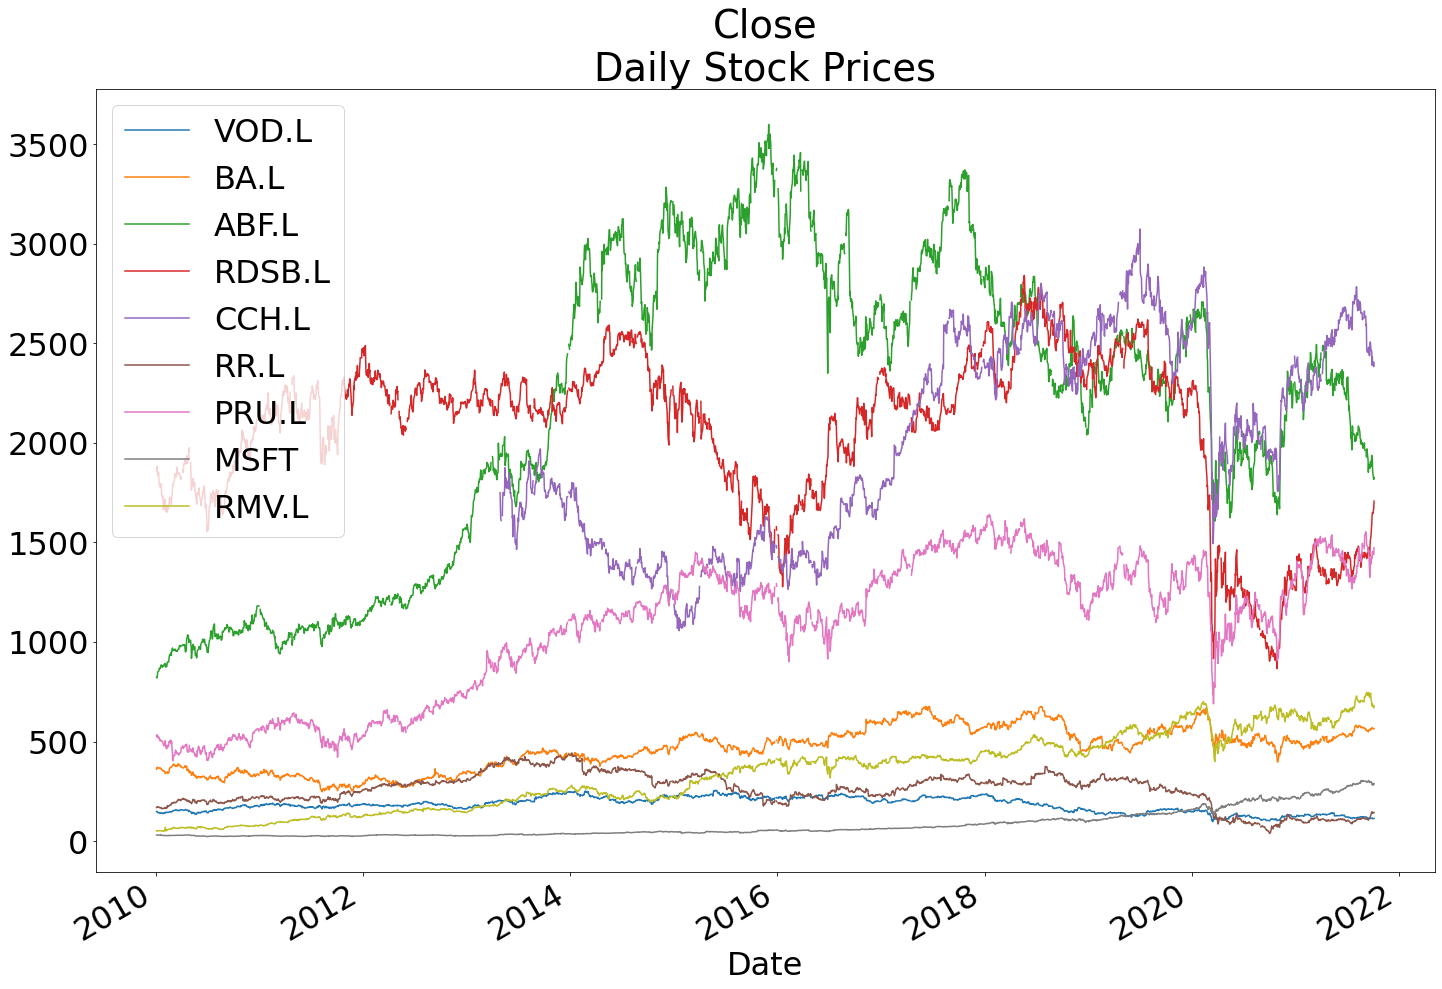

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
plt.title("Close\nDaily Stock Prices")

As anticipated, tech companies like Microsoft, Right Move (RMV.L) and Bae Systems (BA.L) have seen a general increase in their stocks over the years. Significant decrease is the stocks of Royal Dutch Shell (RDSB.L) which is not a surprise due to the gradual switch away from fossil fuel. Coca cola (CCH.L) which is a food and beverage company has seen a rise as compared to Associated Food (ABF.L) whose stocks has dropped from a high in 2016 to 2022. However a better story can be seen when the log of the values are plotted as below. This will show the rate of the increase as compared to the absolute values. 

<ipython-input-11-0a08840478fd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000'),
 Text(0, 100000.0, '100000')]

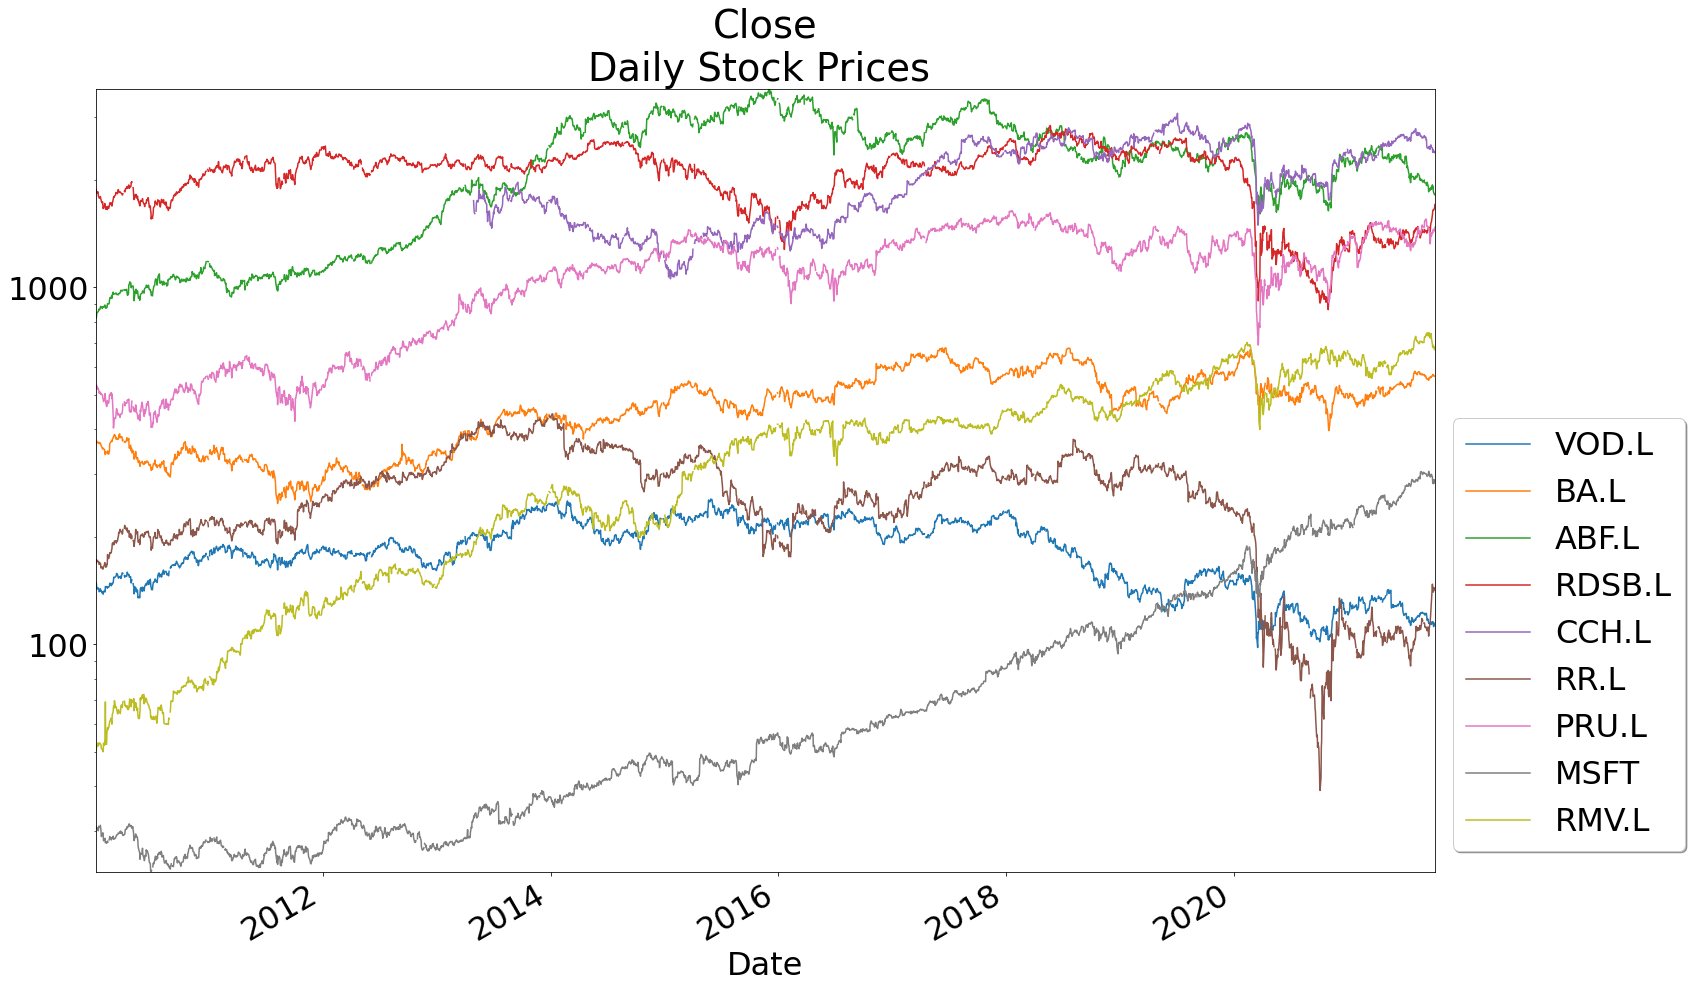

In [11]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})

# this takes out the extra spaces at the margins to make the plots look better
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.6), shadow=True, ncol=1)

plt.title("Close\nDaily Stock Prices ")
ax.set_yscale("log")

#this will change the y ticklabels so that we do not get scientific notations in logs
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

I decided to put the legend on the right outside of the figure because it was covering some important information in the trend. From this analysis, clearly tech stocks have been increasing. Rolls Royce (RR.L) and Royal Dutch Shell have similar movements and this could show some relationships between the companies or their sectors. The ood and beverage companies in this case are recordong gentle increases over the years.

In [12]:
price_change_data = close_data.pct_change() * 100
price_change_data

,VOD.L,BA.L,ABF.L,RDSB.L,CCH.L,RR.L,PRU.L,MSFT,RMV.L
Date,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.139618,1.634347,-0.121655,1.127517,NaN,0.162849,0.312501,0.032305,-2.135919
2010-01-06,-0.419297,1.226492,-0.121803,-1.300770,NaN,2.439012,0.545168,-0.613691,0.694441
2010-01-07,-2.596459,0.026927,2.256098,-0.215169,NaN,-0.972202,-2.633616,-1.039973,1.871923
2010-01-08,-1.296808,-0.807537,1.371497,-1.078167,NaN,0.480860,1.591084,0.689652,0.483559
...,...,...,...,...,...,...,...,...,...
2021-09-29,0.452250,0.741266,1.080369,1.042305,1.757322,1.359878,1.864884,0.169304,1.355335
2021-09-30,-1.904759,-0.981075,-3.023983,0.097086,-1.356908,-3.084375,0.518135,-0.732390,-0.668601
2021-10-01,-0.970879,-0.035388,-0.833333,-0.242483,0.208420,1.955192,-0.309278,2.546819,-0.117069


<ipython-input-13-a90282f63bc3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


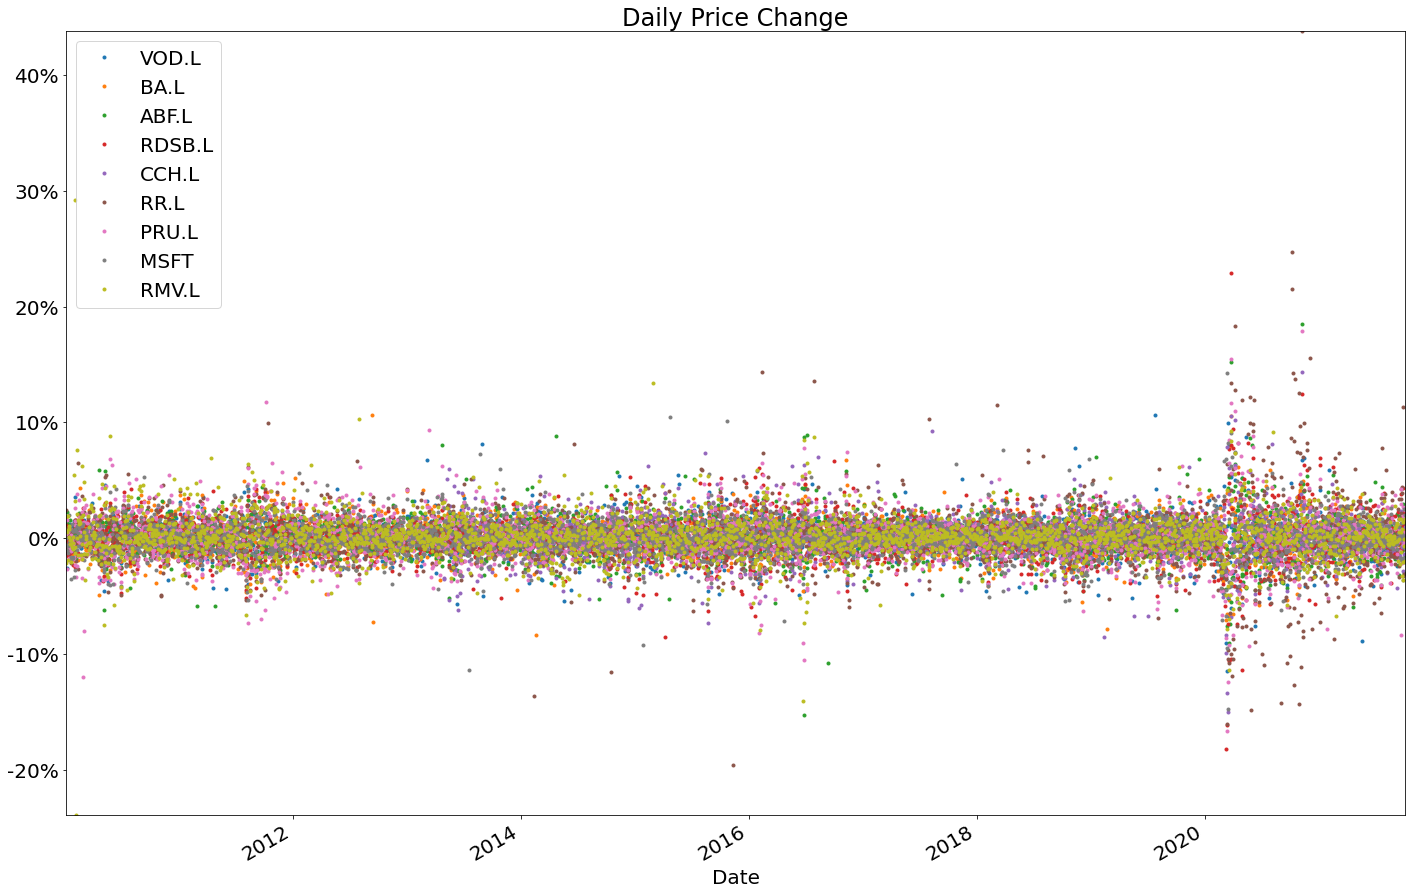

In [13]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].plot.line(ls = "", marker = ".",
                                    ax = ax,
                                    legend = True)
plt.title("Daily Price Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])

plt.show()
plt.close()

Generally the dispersion around the mean has been stable apart from after 2020 which can loosely be attributed to the global pandemic. However, there seem to be a convergence currently.

In [14]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

,VOD.L,BA.L,ABF.L,RDSB.L,CCH.L,RR.L,PRU.L,MSFT,RMV.L
mean,0.002,0.025,0.039,0.012,0.030,0.028,0.053,0.086,0.102
median,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.035,0.050
variance,2.151,2.080,2.571,3.000,3.040,6.827,3.911,2.456,3.376
SD,1.075,1.040,1.285,1.499,1.519,3.412,1.955,1.228,1.687
skewness,0.158,0.128,1.079,0.109,-0.186,0.916,0.109,0.096,0.896
kurtosis,30.232,24.523,39.626,38.745,19.624,10.810,9.537,31.448,50.120


<ipython-input-15-a1070c810861>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])


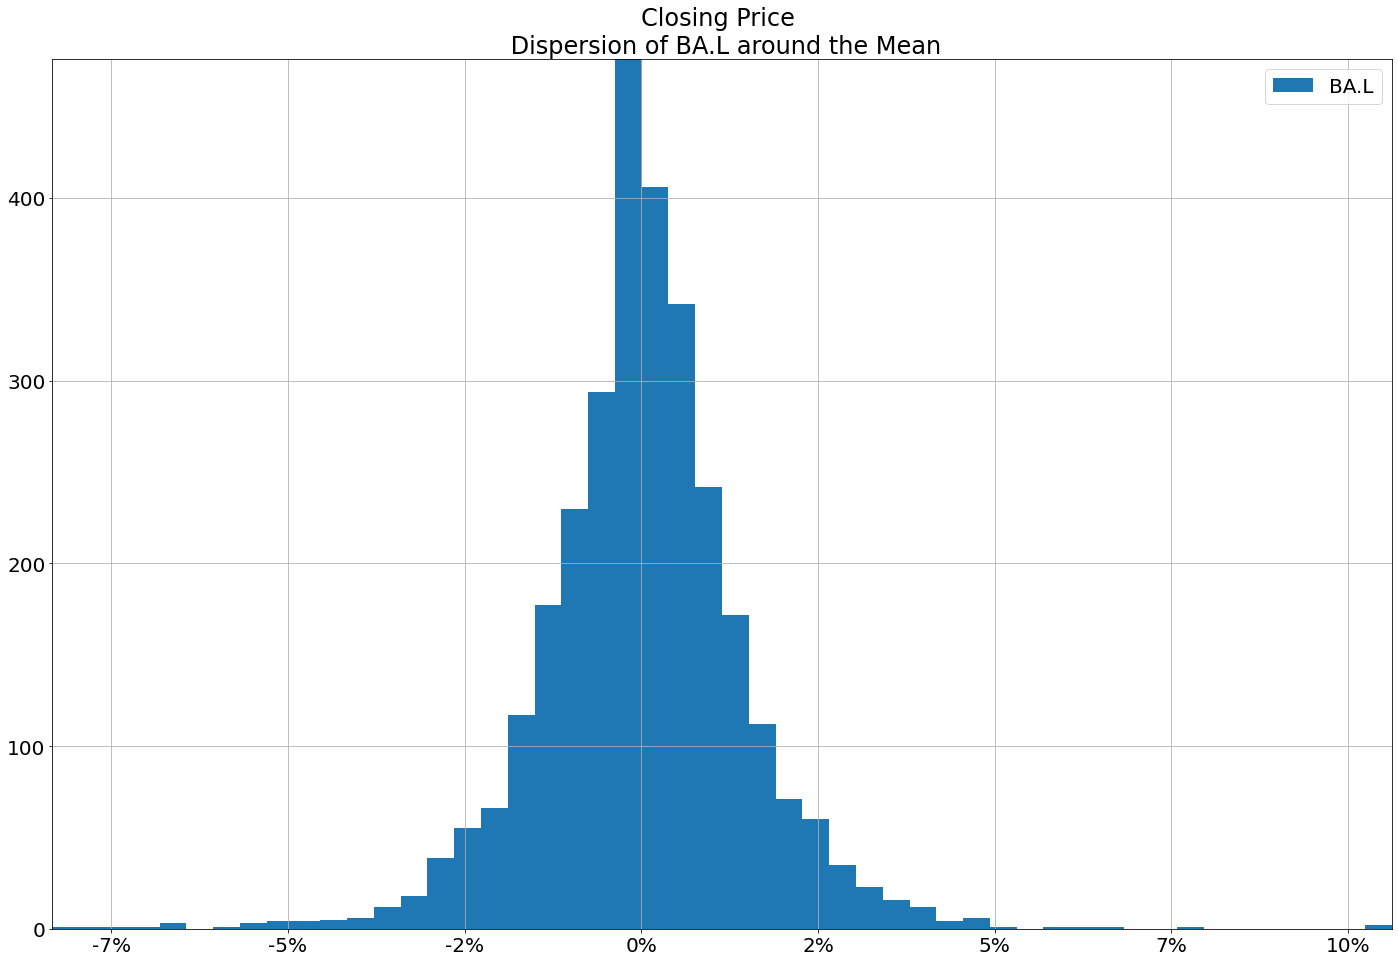

In [15]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["BA.L"].hist(bins = 50, label = "BA.L")

#set the horizntal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
plt.legend()
plt.title("Closing Price \n Dispersion of BA.L around the Mean")
plt.show()

The histogram allows us to view each stocks dispersion from its mean. This stocks looks like a normal distribution that is concerntrated around the 0% and flat tails. Similar displays will be made for all the 9 stocks in one display for easy comparison with gradual visual adjustments.

<ipython-input-16-7cb2c07acc85>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-16-7cb2c07acc85>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


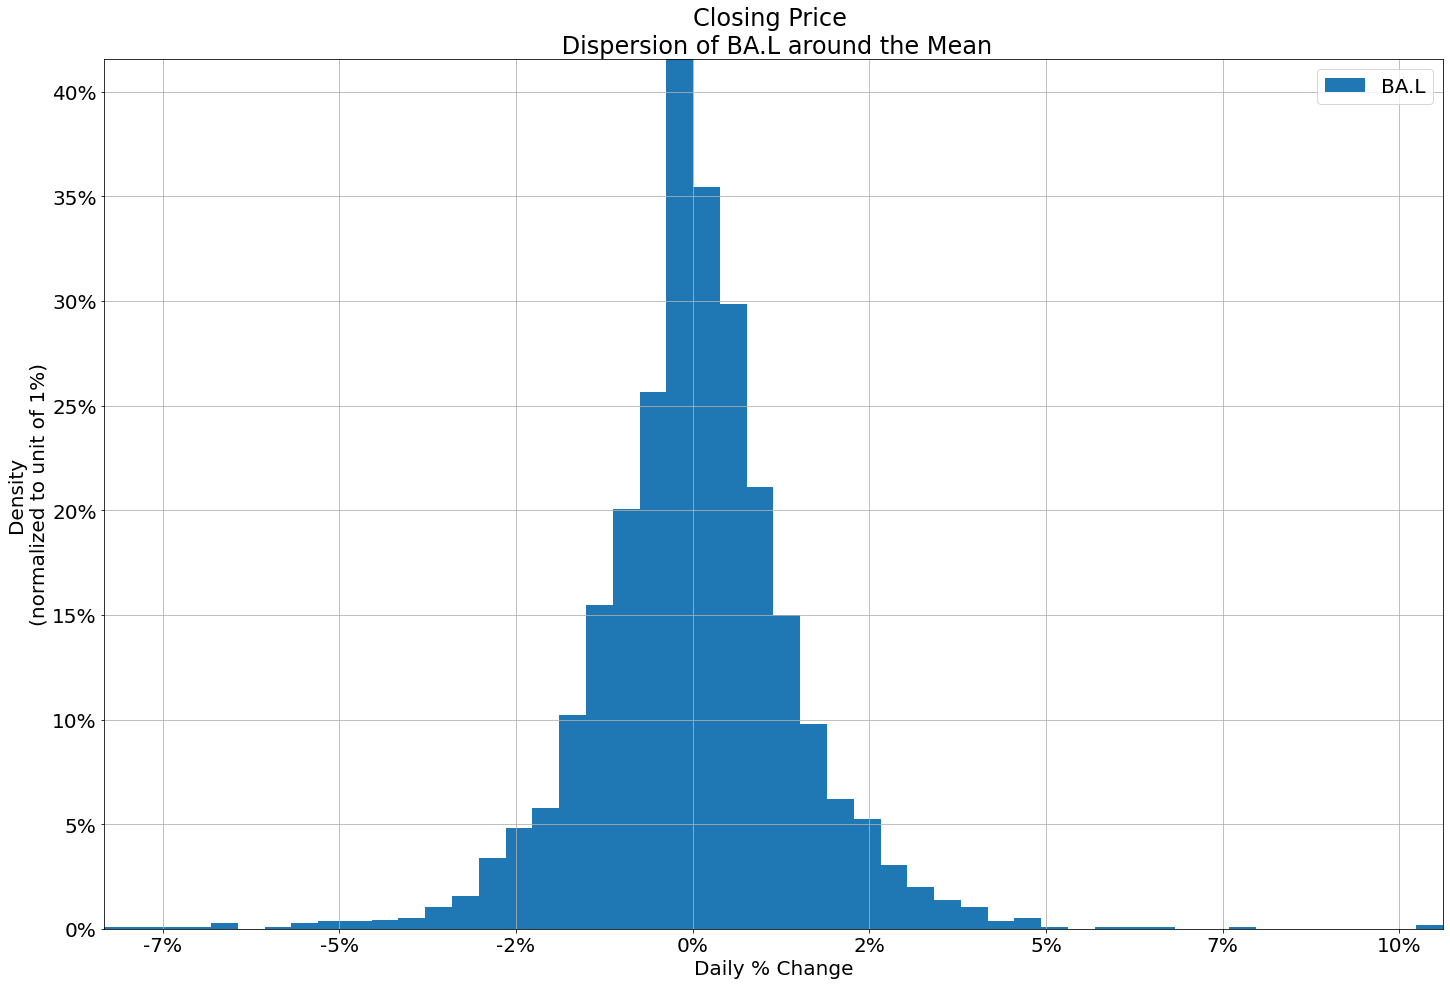

In [16]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["BA.L"].hist(bins = 50,
                               label = "BA.L",
                              density = True)

#set the horizntal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_xlabel("Daily % Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
ax.set_ylabel("Density\n(normalized to unit of 1%)")

plt.title("Closing Price \n Dispersion of BA.L around the Mean")

plt.legend()
plt.show()

Text(0.5, 0.98, 'Closing Price \n Dispersion around their Means')

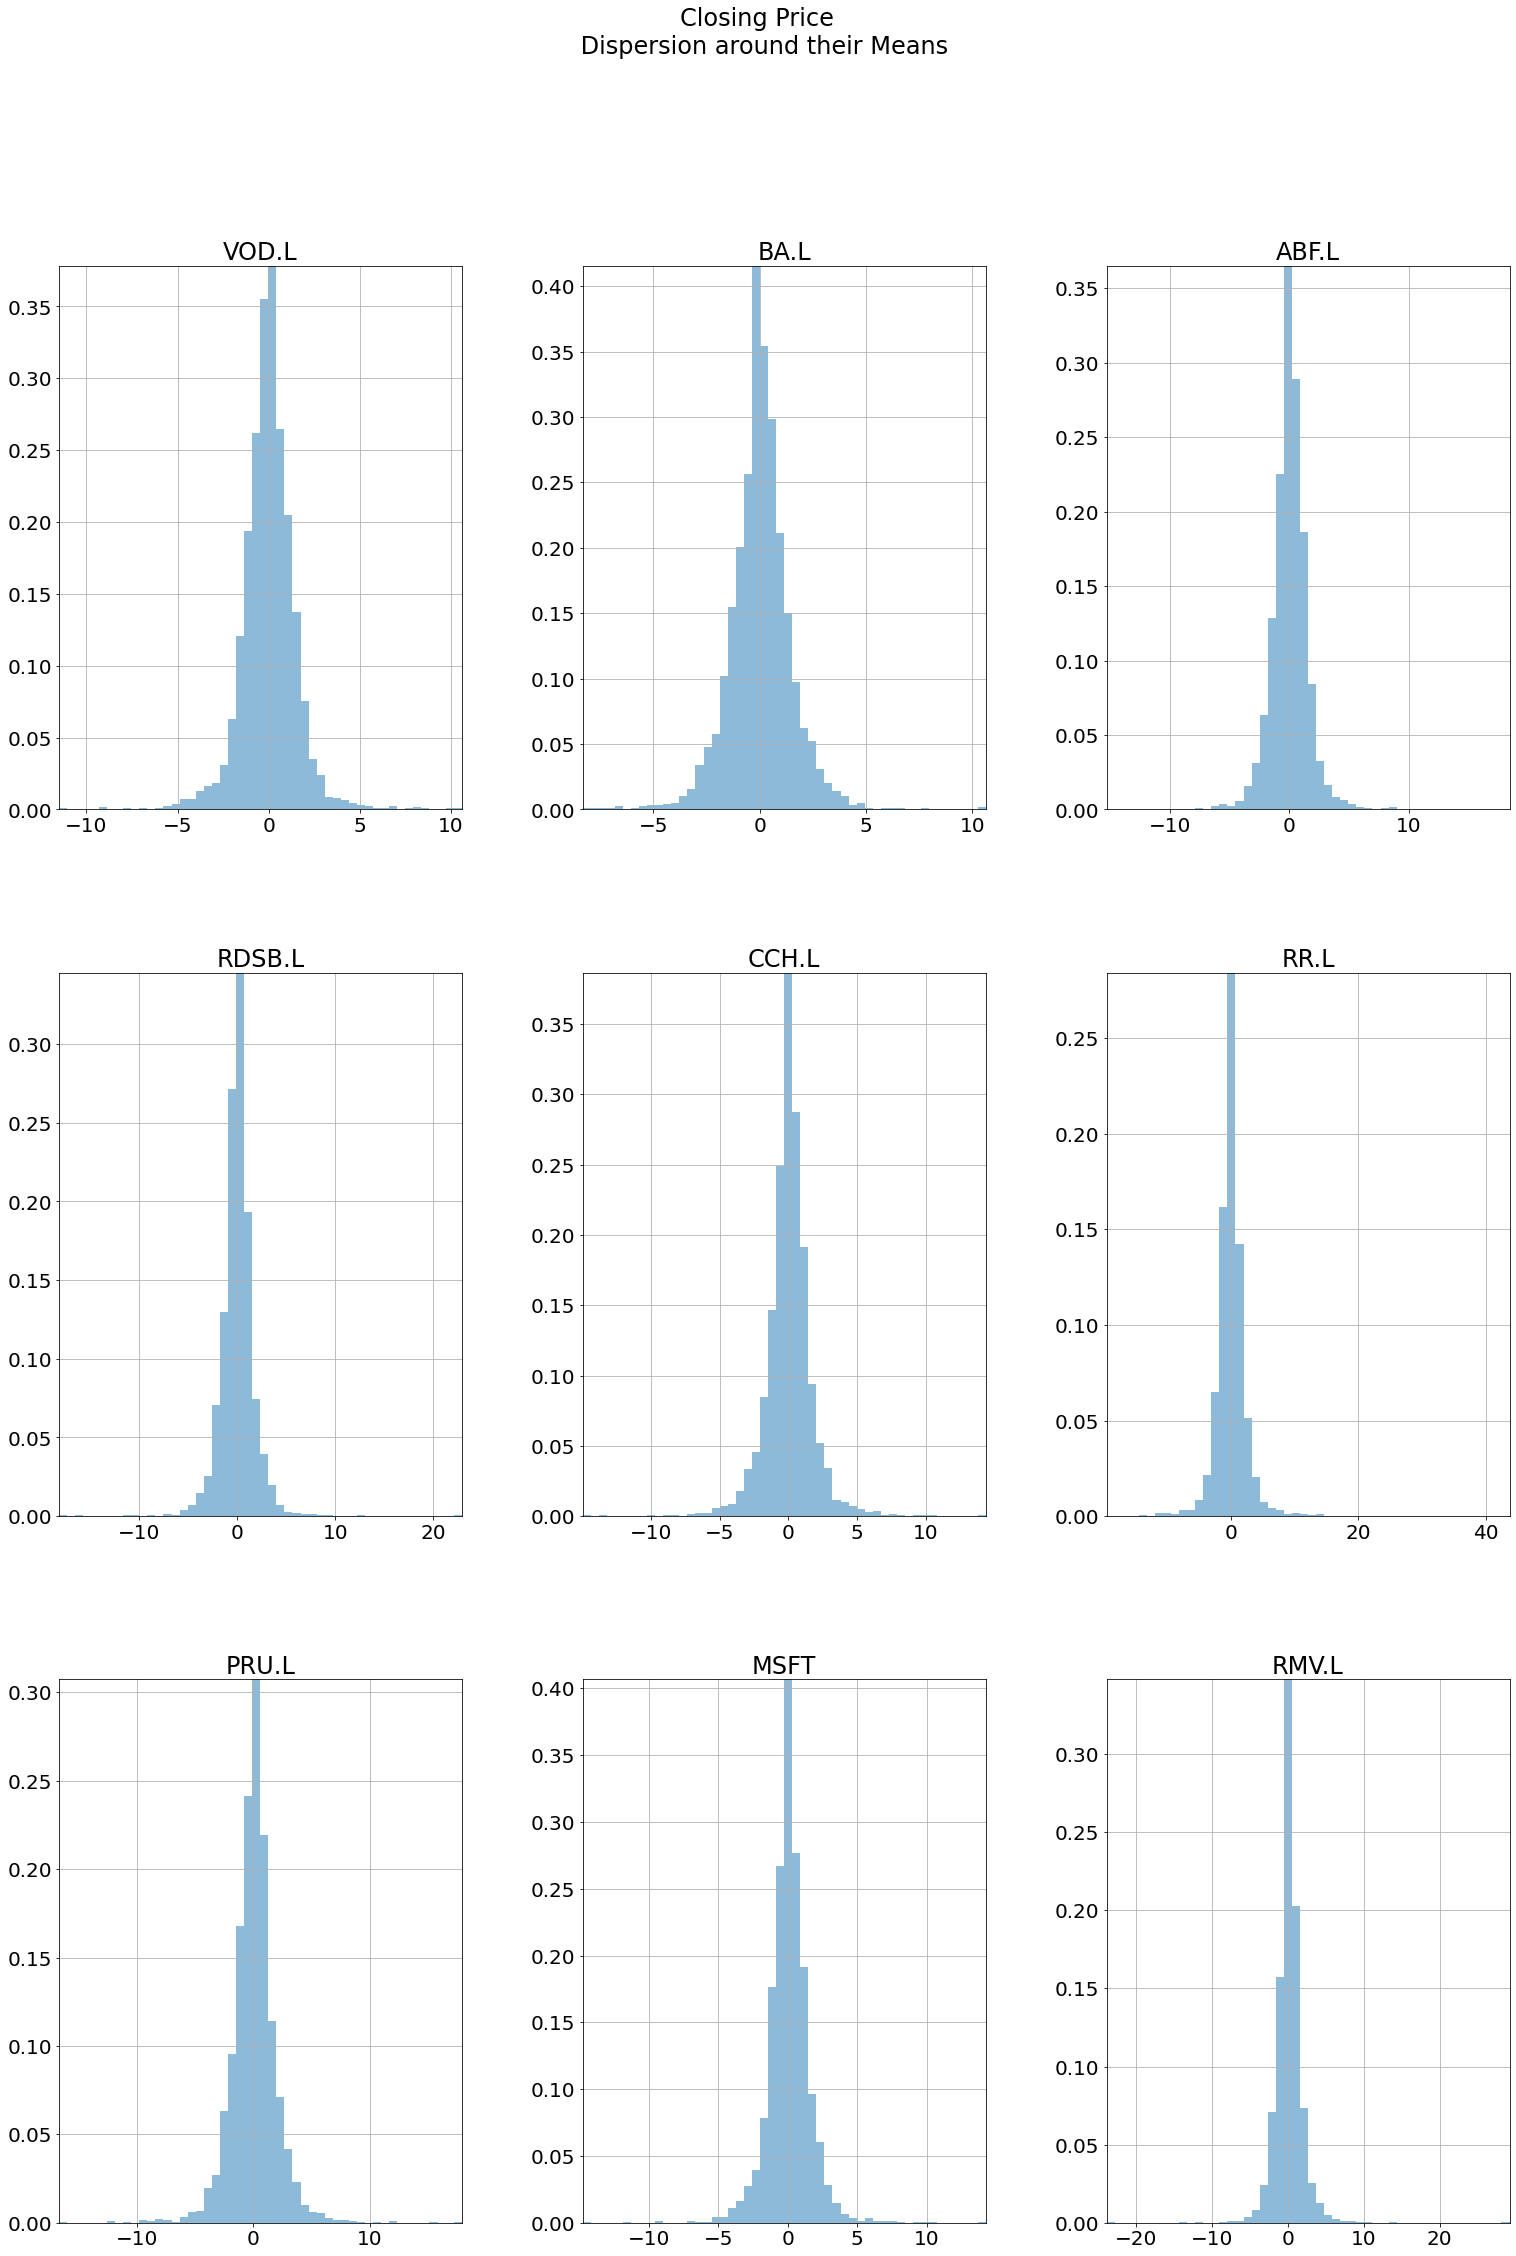

In [17]:
fig, ax = plt.subplots(3,3, figsize = (26, 36))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
fig.suptitle("Closing Price \n Dispersion around their Means")

<ipython-input-18-c2b24cbd93d5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-18-c2b24cbd93d5>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


Text(0.5, 0.98, 'Closing Price \n Dispersion around their Means')

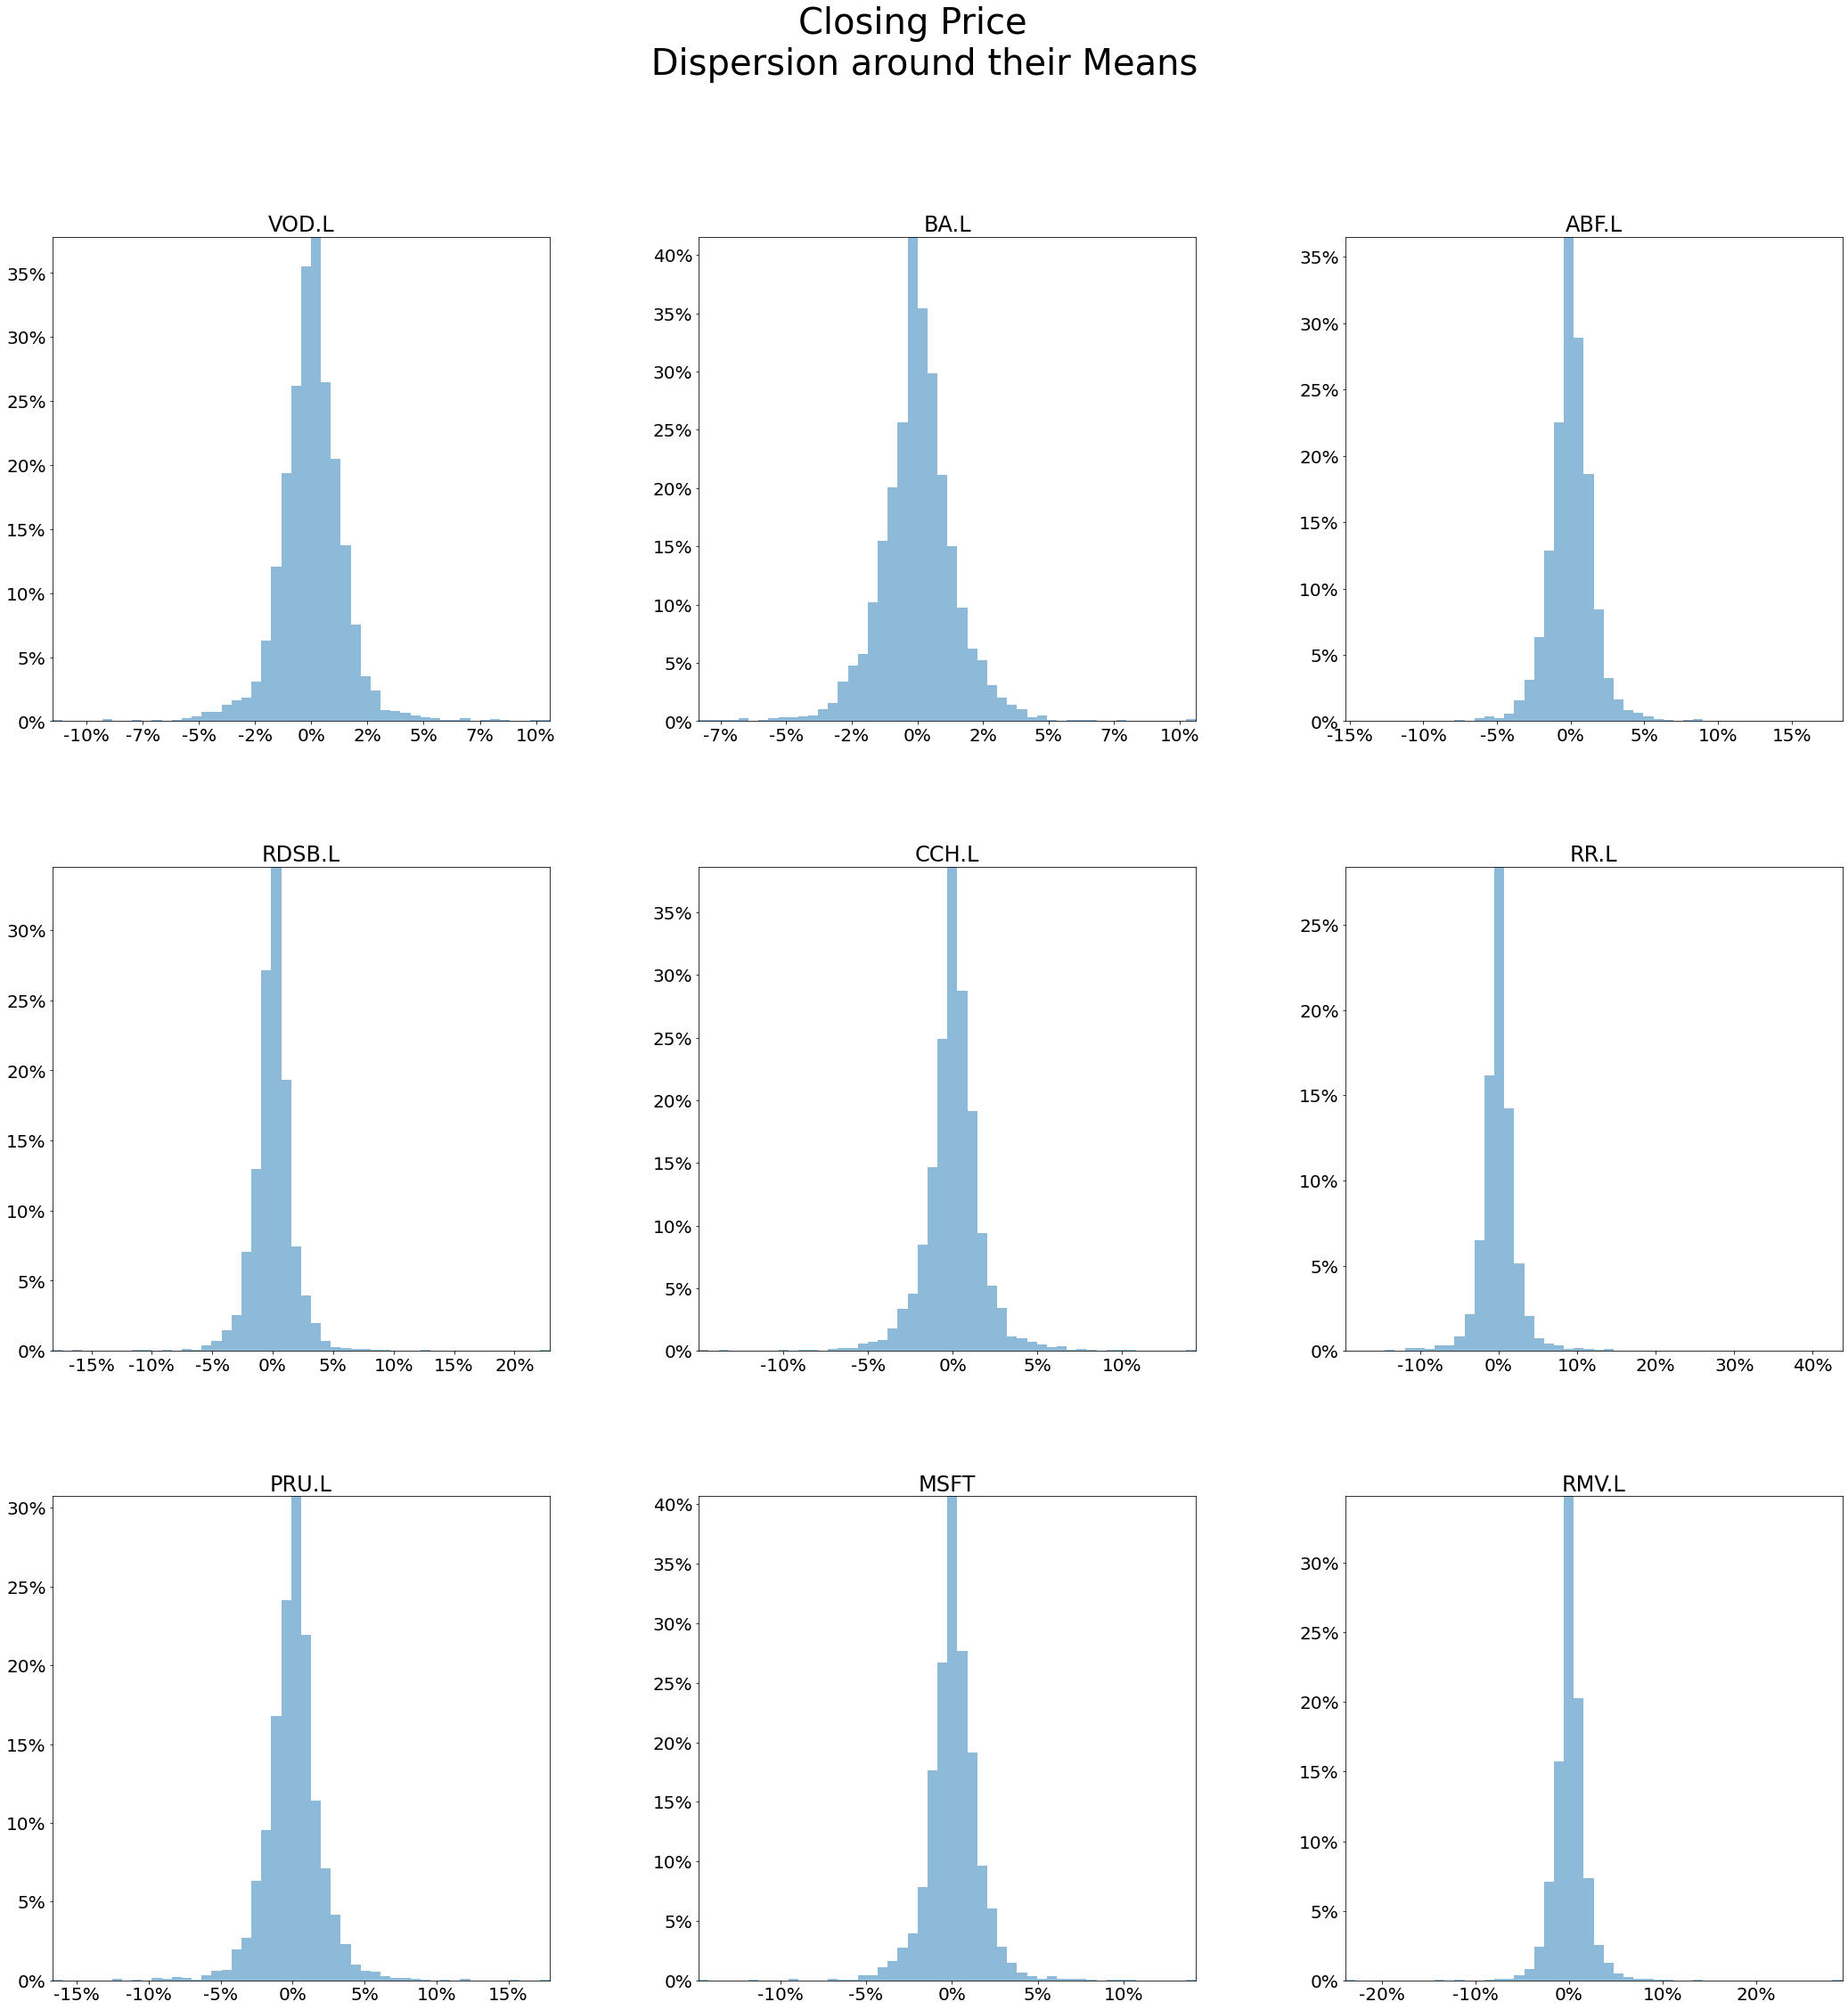

In [18]:
fig, ax = plt.subplots(3,3, figsize = (36, 36))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax [i][j]
        stock = a.get_title()
        a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        a.grid(False)
fig.suptitle("Closing Price \n Dispersion around their Means", fontsize = 40)

<ipython-input-19-5eab9455d496>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-19-5eab9455d496>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


Text(0.5, 0.98, 'Closing Price \n Dispersion around their Means')

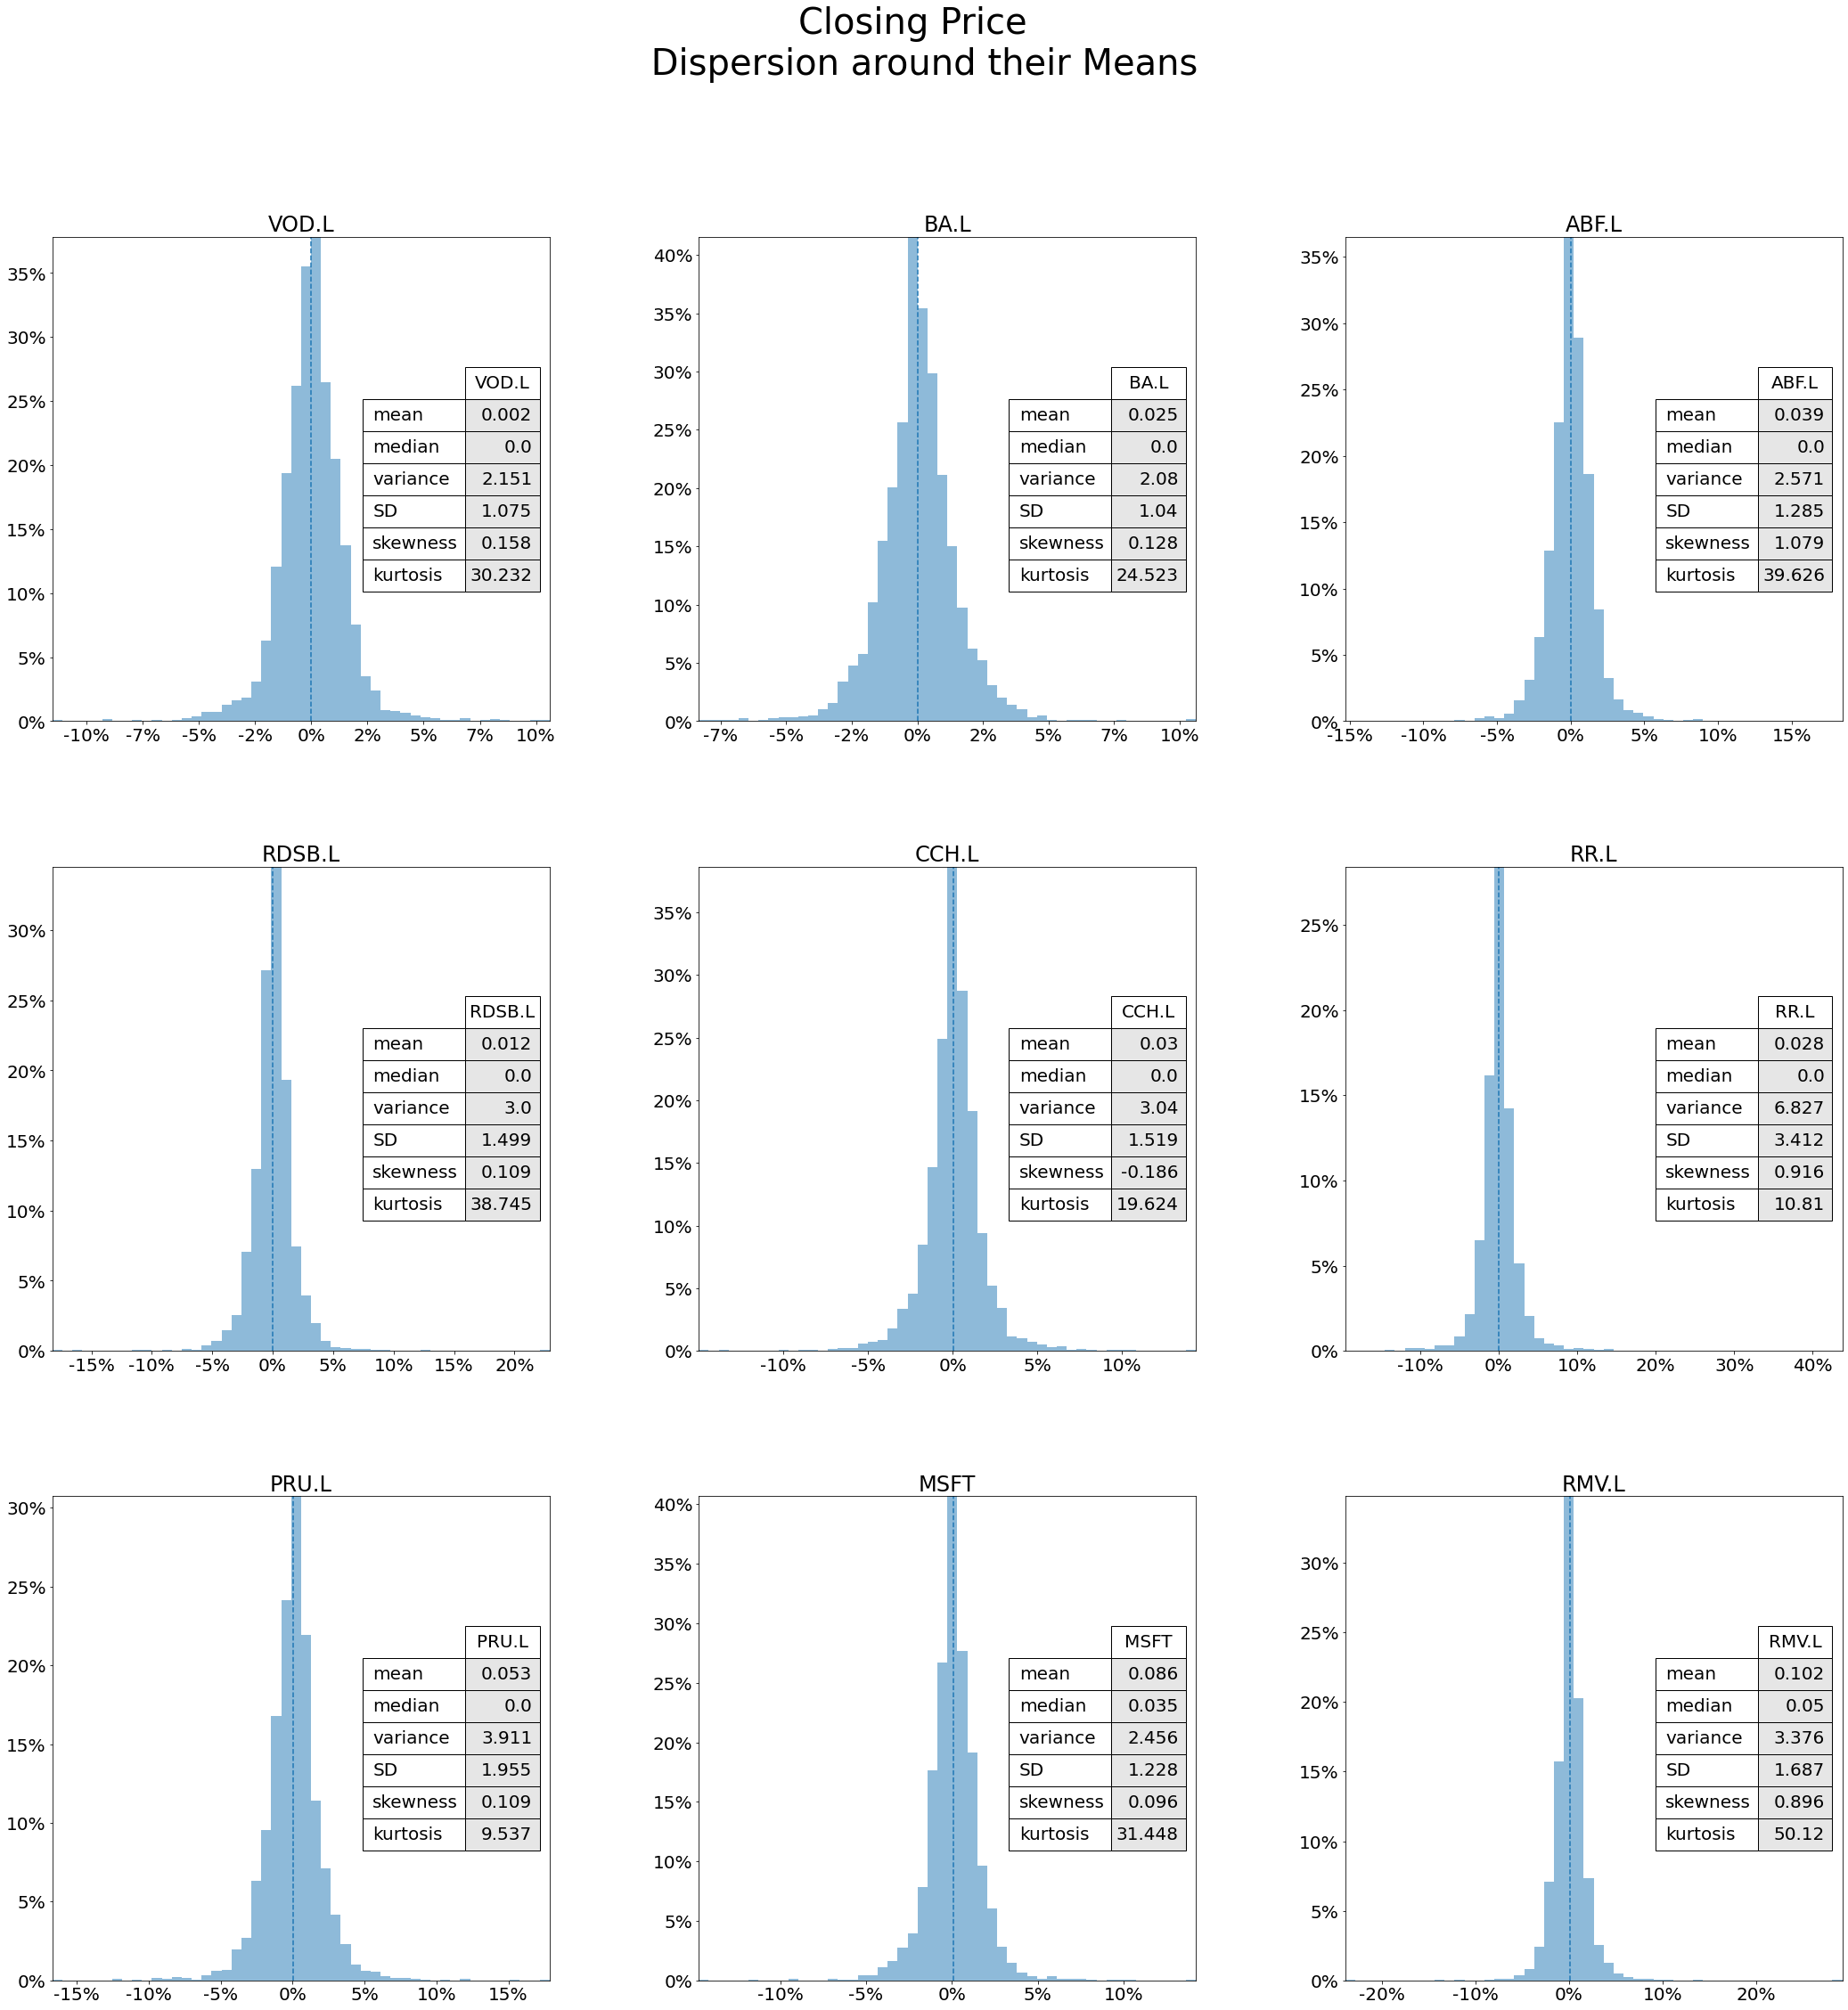

In [19]:
from pandas.plotting import table

fig, ax = plt.subplots(3,3, figsize = (36, 36))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax [i][j]
        stock = a.get_title()
        a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        a.grid(False)
        
        hist_data = stats_df[stock]
        stats_table =table(a,
                     hist_data,
                     colWidths = [.1],
                     cellColours = [[(.9,.9,.9)]]*6,
                     loc = "center right")
        
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)
        
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
fig.suptitle("Closing Price \n Dispersion around their Means", fontsize = 40)

Decided to add a stats table to help in comparisoon and detailed comparison. In kurtosis analysis, having a fatter tails result from a greater chance of extreme positive or negative movements. It is not strange tech companies like Microsoft and Right move have relative high numbers. Royal Ducth also has high movement due to the fluctuation in oil prices as well as switch towards other sustainable energy sources. The skewness also speaks to the asymmetry of the distribution.

<ipython-input-20-6fda475247cd>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-20-6fda475247cd>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


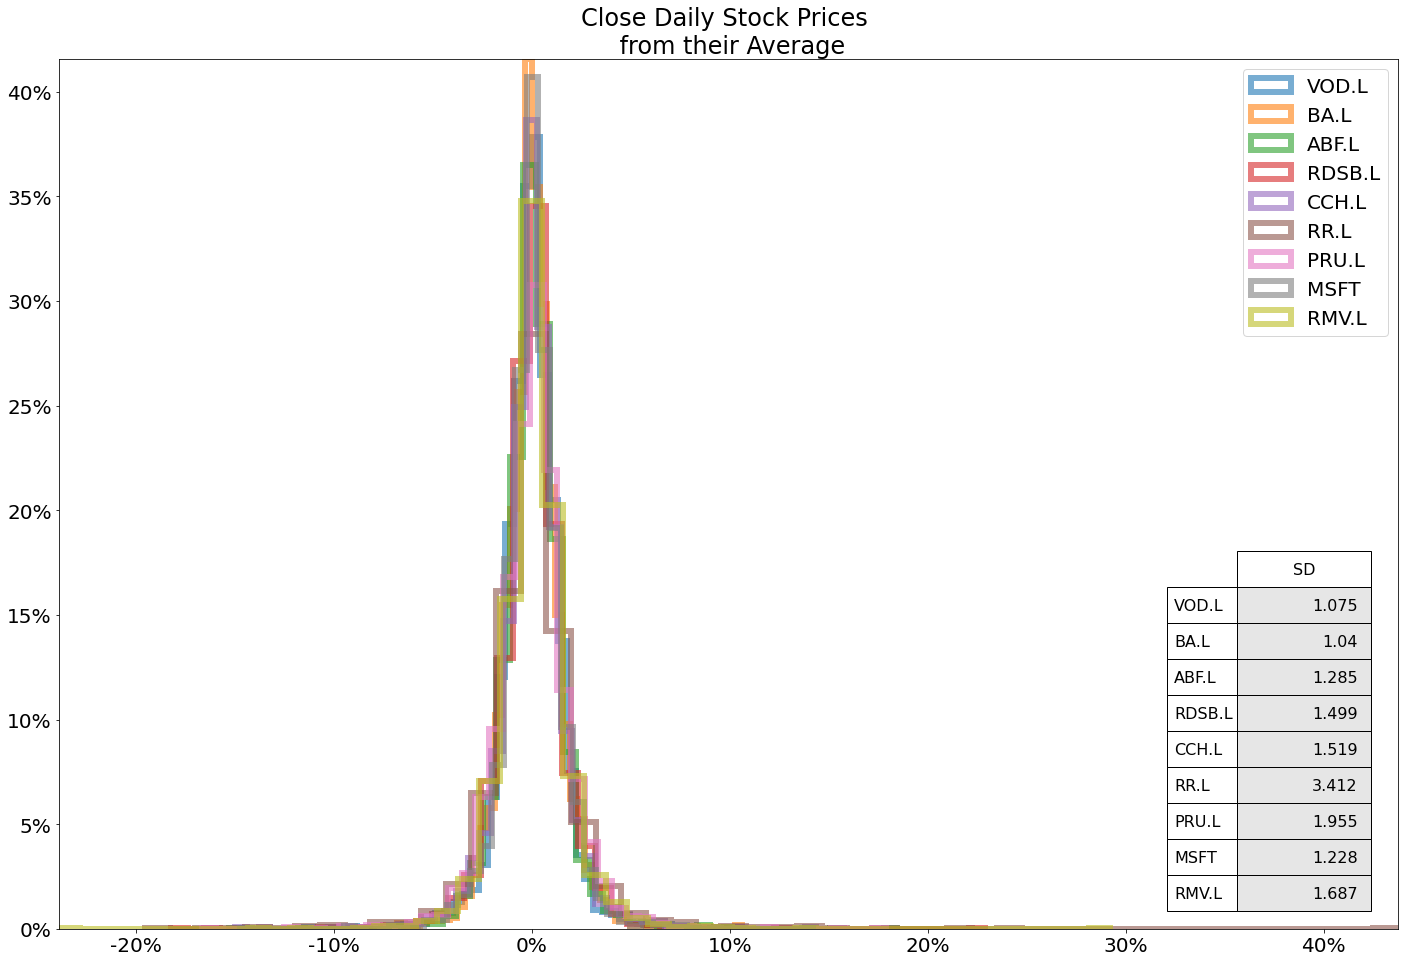

In [20]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .6, label = key, linewidth = 6, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["SD"], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*9, loc = "lower right")
stats.scale(1,3)
stats.auto_set_font_size(False)
stats.set_fontsize(16)
ax.grid(False)
plt.title("Close Daily Stock Prices \n from their Average")
plt.legend()

Additionally, we can plot each histogram openly on a single plot for ease of comparison.This allows us to put all stocks against each other. 

<ipython-input-21-819a84428e57>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-21-819a84428e57>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


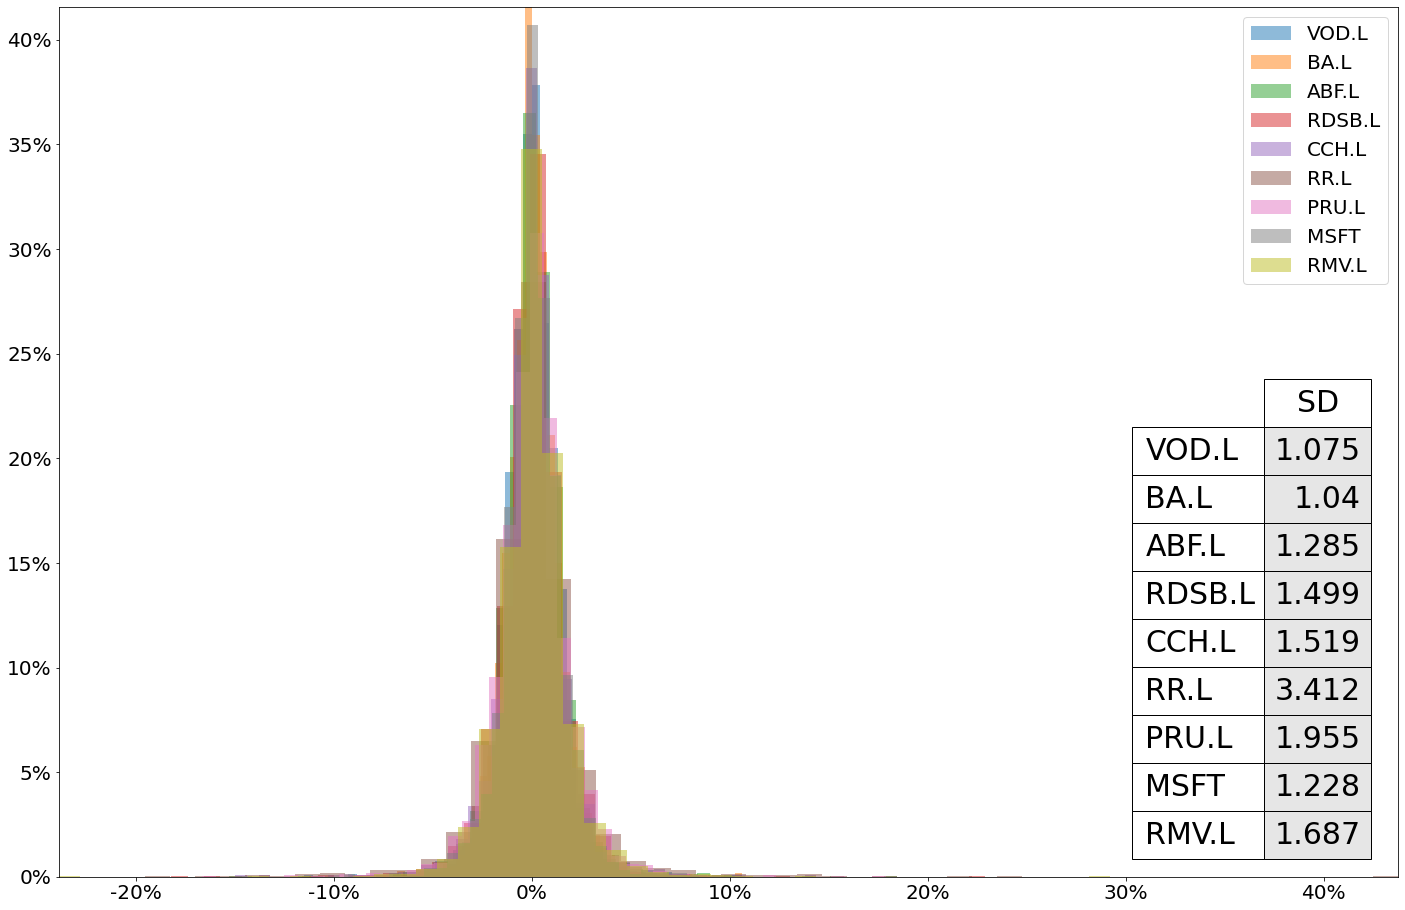

In [21]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .5, label = key, linewidth = 6,
                                density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])

stats =table(ax, stats_df.loc["SD"], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*9, loc = "lower right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()